In [1]:
from Wavefronts import *
from Storage import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# More Efficient Algorithm

Intiate Algorithm 

In [2]:
Storage_Voltage_Active.append(Wavefront_Source(Voltage_Souce_Magnitude,0,Voltage_Source_Period_On,0))
Storage_Voltage_Active[0].about()


Some Information about a wavefront
Type :                             <class 'Wavefronts.Wavefront_Source'>
Poisiton Start :                   0
Poisiton End :                     0
Time Start :                       0
Time End :                         0.000012
Voltage Magnitude :                50
Current Magnitude :                0
Excitation Type :                  HIGH
Excitation Number :                0
Order :                            0
Inductive Reflections :            0
Capacitive Reflections :           0
Current Chain Reflections :        0
Transmission Ind -> Cap :          0
Transmission Cap -> Ind :          0


In [3]:
Storage_Away : Wavefront = deque()
Storage_Return : Wavefront = deque()

is_Simulation_Completed = False

Store outgoing waves in AWAY

In [4]:
temp_wavefront = Storage_Voltage_Active.popleft()
temp_wavefront.Generate(Storage_Away,Storage_Away)
Storage_Voltage_Completed.append(temp_wavefront)

In [5]:
while not is_Simulation_Completed:

    # Manage away waves, generate return waves

    is_Inductive = True

    while len(Storage_Away)> 0:
        temp_wavefront = Storage_Away.popleft()
        temp_wavefront.Generate(Storage_Return,Storage_Return)

        if(is_Inductive):
            Storage_Inductor_Completed.append(temp_wavefront)
        else:
            Storage_Capacitor_Completed.append(temp_wavefront)

        is_Inductive = not is_Inductive

    # Manage return waves, check simulation end criteria, generate and merge away waves

    ## Do this always for the first wave. It can *never merge.
    temp_wavefront = Storage_Return.popleft()

    if Inductor_Time <= Capacitor_Time:
        if temp_wavefront.time_start >= Simulation_Stop_Time:
            is_Simulation_Completed = True

    temp_wavefront.Generate(Storage_Away,Storage_Away)

    Storage_Inductor_Completed.append(temp_wavefront)

    while len(Storage_Return) > 0:

        temp_wavefront = Storage_Return.popleft()

        if len(Storage_Return) == 0 : # It is the last wave
            if(Capacitor_Time <= Inductor_Time and temp_wavefront.time_start >= Simulation_Stop_Time):
                is_Simulation_Completed = True

            temp_wavefront.Generate(Storage_Away,Storage_Away)
            Storage_Capacitor_Completed.append(temp_wavefront)

        else: # It is not the last wave
            temp_next_wavefront = Storage_Return.popleft()

            temp_wavefront_inductive, temp_wavefront_capacitve = temp_wavefront.Generate_Return()
            temp_next_wavefront_inductive, temp_next_wavefront_capacitve = temp_next_wavefront.Generate_Return()

            temp_wavefront_inductive.Merge(temp_next_wavefront_inductive)
            temp_wavefront_capacitve.Merge(temp_next_wavefront_capacitve)

            Storage_Away.append(temp_wavefront_inductive)
            Storage_Away.append(temp_wavefront_capacitve)

            Storage_Capacitor_Completed.append(temp_wavefront)
            Storage_Inductor_Completed.append(temp_next_wavefront)


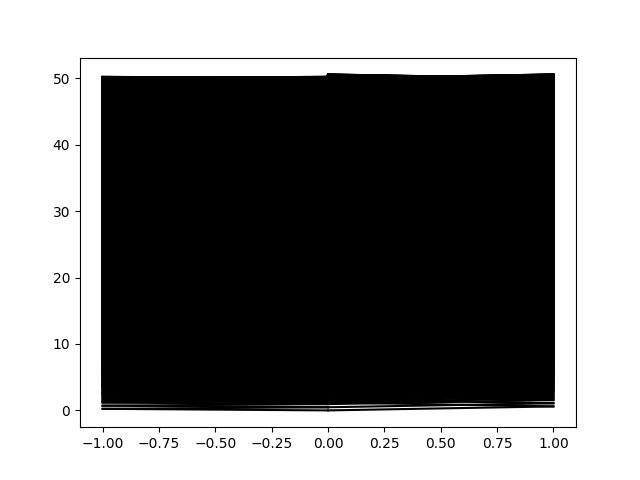

In [6]:
# make it %matplotlib widget
# for widgets

%matplotlib widget
#%matplotlib

for wave in Storage_Capacitor_Completed:
    plt.figure(0)
    x1 = -wave.position_start
    x2 = -wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.time_start <=Simulation_Stop_Time):
        plt.plot([x1,x2],[y1,y2],'k-')


for wave in Storage_Inductor_Completed:
    plt.figure(0)
    x1 = wave.position_start
    x2 = wave.position_end

    y1 = wave.time_start
    y2 = wave.time_end

    if(wave.time_start <=Simulation_Stop_Time):
        plt.plot([x1,x2],[y1,y2],'k-')

plt.show()

In [7]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []
combination_count = 0

for wave in Storage_Capacitor_Completed:
    
    time = 0

    if wave.position_start == 0:
        time = wave.time_start
    else:
        time = wave.time_end

    try:
        index = Time_Array_Capacitor.index(time)
        combination_count = combination_count  + 1
    except:
        index = False

    if(index == False):
        Time_Array_Capacitor.append(time)
        Voltage_Array_Capacitor.append(wave.magnitude_voltage)
        Current_Array_Capacitor.append(wave.magnitude_current)
    else:
        Voltage_Array_Capacitor[index] = Voltage_Array_Capacitor[index] + wave.magnitude_voltage
        Current_Array_Capacitor[index] = Current_Array_Capacitor[index] + wave.magnitude_current

Voltage_Array_Inductor = []
Current_Array_Inductor = []
Time_Array_Inductor = []

for wave in Storage_Inductor_Completed:
    
    time = 0

    if wave.position_start == 0:
        time = wave.time_start
    else:
        time = wave.time_end

    try:
        index = Time_Array_Inductor.index(time)
    except:
        index = False

    if(index == False):
        Time_Array_Inductor.append(time)
        Voltage_Array_Inductor.append(wave.magnitude_voltage)
        Current_Array_Inductor.append(wave.magnitude_current)
    else:
        Voltage_Array_Inductor[index] = Voltage_Array_Inductor[index] + wave.magnitude_voltage
        Current_Array_Inductor[index] = Current_Array_Inductor[index] + wave.magnitude_current

In [8]:
Time_Voltage_Array_Capacitor = sorted(zip(Time_Array_Capacitor,Voltage_Array_Capacitor))
Time_Voltage_Array_Inductor = sorted(zip(Time_Array_Inductor,Voltage_Array_Inductor))

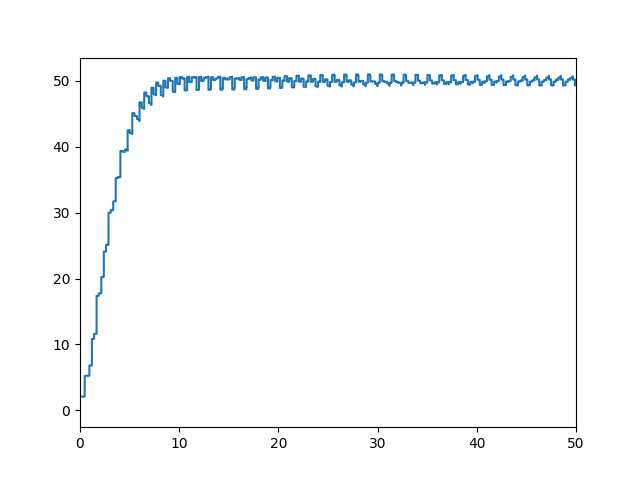

In [9]:

x,y = zip(*Time_Voltage_Array_Capacitor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.figure(1)
plt.xlim(0,Simulation_Stop_Time)
plt.step(x,y,where='post')


Save as CSV for anaylsis

In [10]:
dict = {'time':x, 'Voltage Capacitor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Capacitor_Voltage.csv',index=False)

Plot Inductor Voltage

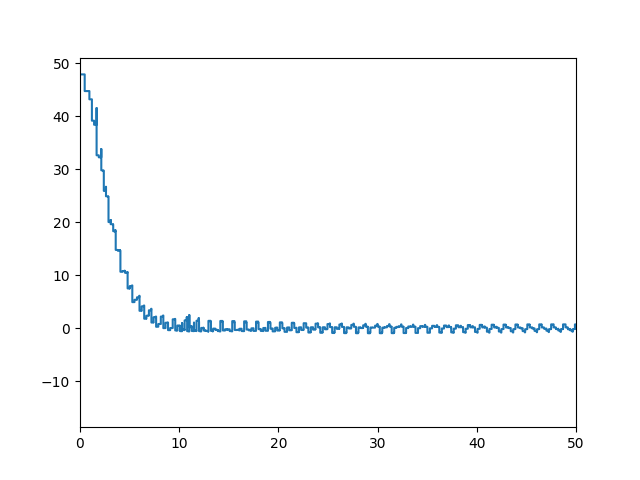

In [11]:
x,y = zip(*Time_Voltage_Array_Inductor)

x= list(x)
y= list(y)

for i in range(1,len(y)-1):
    y[i] = y[i-1]+y[i] 

plt.figure(2)
plt.xlim(0,Simulation_Stop_Time)
plt.step(x,y,where='post')


Save Inductor Voltage

In [12]:
dict = {'time':x, 'Voltage Inductor':y}
data_frame = pd.DataFrame(dict)
data_frame.to_csv('Inductor_Voltage.csv',index=False)